 # This notebook will take a list of OGs and make dotplots for all of them that show how many family members are in each strain

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the OG data in as a dictionary with OGs as the keys and the number of family members in each strain (as an integer) as the values

In [2]:
# open the file and make an initial dictionary that has orthogroups as keys and all the gene numbers as values
#NOTE: this CSV file can NOT have a header
with open('../../only_changes.csv') as mainfilehandle:
    reader = csv.reader(mainfilehandle, delimiter=',')
    l = list(reader)
    d = {row[0]:row[1:] for row in l}

# make an empty dictionary that will eventually contain orthogroups and gene numbers as integers (and not strings)
dInt = {}

#for every key in the initial dictionary...
for k in d:
    
    #make a new key in the "integer" dictionary that is the key you're currently looping on
    dInt[k] = []
    
    #for every value with that key
    for v in d[k]:
        
        #convert the number to an integer
        new = int(v)
        
        #and append it into the "integer" dictionary
        dInt[k].append(new)

 ## Make a function that will make a dotplot of any OG you provide

In [3]:
#orthogroup will be the only parameter
def dotplot(orthogroup):
    #make a list that is the pathogenicity levels of the species in the order that they will be in the dataframe
    pathogenicity = ['high', 'high', 'high', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',\
                 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
    
    #make a list that is the strains
    strain = ['A_neoellipticus_NRRL5109', 'A_fumigatus_12-750544', 'A_fumigatus_A1163', 'A_fumigatus_Af293', \
              'A_fumigatus_F16311', 'A_lentulus_IFM54703', 'A_novofumigatus_IBT16806', 'A_udagawae_IFM46973', \
              'A_viridinutans_FRR_0576', 'A_thermomutatus_HMRAF39', 'A_cejpii_FS110', 'A_clavatus_NRRL1', \
              'A_cristatus_GZAAS20.1005', 'A_fischeri_NRRL181', 'A_glaucus_CBS516.65', 'A_turcosus_HMRAF1038', \
              'A_turcosus_HMRAF23', 'A_wentii_DTO134E9']
              
    
    #make a list of the gene counts in the same order as the pathogenicity list
    values = [dInt[orthogroup][1], dInt[orthogroup][5], dInt[orthogroup][6], dInt[orthogroup][7], dInt[orthogroup][8], \
          dInt[orthogroup][10], dInt[orthogroup][11], dInt[orthogroup][12], dInt[orthogroup][15], dInt[orthogroup][16], \
          dInt[orthogroup][0], dInt[orthogroup][2], dInt[orthogroup][3], dInt[orthogroup][4], dInt[orthogroup][9], \
              dInt[orthogroup][13], dInt[orthogroup][14], dInt[orthogroup][17]]

    #make a pandas dataframe with strain, Gene_Count, and a Pathogenicity_Level column
    df = pd.DataFrame(list(zip(strain, values, pathogenicity)), columns = ['Strain', 'Gene_Count','Pathogenicity_Level'])
    
    sns.swarmplot(x="Pathogenicity_Level", y="Gene_Count", data=df, size=10).set_title(orthogroup);

 ## Make a function that will save a dotplot of any OG you provide

In [4]:
#orthogroup will be the only parameter
def dotplot_save(orthogroup):
    #make a list that is the pathogenicity levels of the species in the order that they will be in the dataframe
    pathogenicity = ['high', 'high', 'high', 'high', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',\
                 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low']
    
    #make a list that is the strains
    strain = ['A_neoellipticus_NRRL5109', 'A_fumigatus_12-750544', 'A_fumigatus_A1163', 'A_fumigatus_Af293', \
              'A_fumigatus_F16311', 'A_lentulus_IFM54703', 'A_novofumigatus_IBT16806', 'A_udagawae_IFM46973', \
              'A_viridinutans_FRR_0576', 'A_thermomutatus_HMRAF39', 'A_cejpii_FS110', 'A_clavatus_NRRL1', \
              'A_cristatus_GZAAS20.1005', 'A_fischeri_NRRL181', 'A_glaucus_CBS516.65', 'A_turcosus_HMRAF1038', \
              'A_turcosus_HMRAF23', 'A_wentii_DTO134E9']
              
    
    #make a list of the gene counts in the same order as the pathogenicity list
    values = [dInt[orthogroup][1], dInt[orthogroup][5], dInt[orthogroup][6], dInt[orthogroup][7], dInt[orthogroup][8], \
          dInt[orthogroup][10], dInt[orthogroup][11], dInt[orthogroup][12], dInt[orthogroup][15], dInt[orthogroup][16], \
          dInt[orthogroup][0], dInt[orthogroup][2], dInt[orthogroup][3], dInt[orthogroup][4], dInt[orthogroup][9], \
              dInt[orthogroup][13], dInt[orthogroup][14], dInt[orthogroup][17]]

    #make a pandas dataframe with strain, Gene_Count, and a Pathogenicity_Level column
    df = pd.DataFrame(list(zip(strain, values, pathogenicity)), columns = ['Strain', 'Gene_Count','Pathogenicity_Level'])
    
    #start a new figure
        #note this is key when using the function in a loop; otherwise the loop will start putting all the new figures \
        #in the sameaxis/file
    plt.figure(orthogroup)
    
    #make the dotplot
    sns.swarmplot(x="Pathogenicity_Level", y="Gene_Count", data=df, size=10).set_title(orthogroup)
    
    #save the dotplot where I want it with the OG as its file name
    plt.savefig('adj05_dotplots/'+ orthogroup +'.pdf')
    
    #close the plot
        #this helps with memory management, I think...
    plt.close()

 ## Open the file that is a single column of all the OGs of interest and save them as a list

In [5]:
#with open("10K_adj05_OGs.txt", "r") as f:
 #   OGs = []
  #  for item in f:
        #needed to remove the carriage returns
   #     OGs.append(item[:-1])

 ## Loop through all the OGs of interest and save dotplots of them

In [6]:
#for family in OGs:
 #   dotplot_save(family)

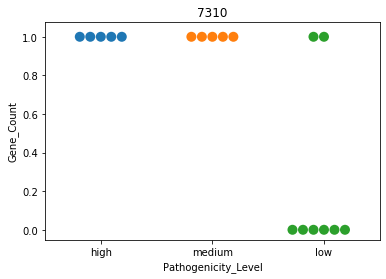

In [4]:
dotplot('7310')